In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
PARENTDIR = os.path.dirname(os.getcwd())
PARENTDIR = os.path.dirname(PARENTDIR)
PARENTDIR

'/Users/aswin/AI_for_Patient_Outcomes'

In [3]:
df = pd.read_csv(f"{PARENTDIR}/Dataset/diabetic_data.csv")


In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df = df[["encounter_id", "race", 
         "gender", "age", "admission_type_id", 
         "discharge_disposition_id", "admission_source_id", "time_in_hospital",
        "num_lab_procedures", "num_medications", "number_outpatient", "number_emergency", "number_diagnoses", "diabetesMed", "readmitted"]]

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a DataFrame called df
le = LabelEncoder()

df["race"] = le.fit_transform(df["race"])
df["gender"] = le.fit_transform(df["gender"])
df["diabetesMed"] = le.fit_transform(df["diabetesMed"])
df["readmitted"] = le.fit_transform(df["readmitted"])


In [8]:
def map_age_range_to_value(age_range):
    age_range_str = str(age_range)  # Convert age_range to a string
    age_range_parts = age_range_str.split('-')  # Split the string at the '-' character
    age_start = int(age_range_parts[0][1:])  # Extract the starting age value from the first part of the split
    age_end = int(age_range_parts[1][:-1])  # Extract the ending age value from the second part of the split
    age_value = ((age_start + age_end) // 2) + 1  # Calculate the average age value and add 1 to get the midpoint of the range
    return age_value
df['age'] = df['age'].apply(map_age_range_to_value)


In [9]:
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,diabetesMed,readmitted
0,2278392,3,0,6,6,25,1,1,41,1,0,0,1,0,2
1,149190,3,0,16,1,1,7,3,59,18,0,0,9,1,1
2,64410,1,0,26,1,1,7,2,11,13,2,0,6,1,2
3,500364,3,1,36,1,1,7,2,44,16,0,0,7,1,2
4,16680,3,1,46,1,1,7,1,51,8,0,0,5,1,2


In [10]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=20, max_depth=6, random_state=0)
randomforest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, n_estimators=20, random_state=0)

In [15]:
from sklearn.metrics import mean_squared_error

# Predict on the testing data
y_pred = randomforest_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: ", mse)
print("Y_pred: ", y_pred)

Mean squared error:  0.4424111039408038
Y_pred:  [1.65245779 1.42994237 1.29385116 ... 1.37311236 1.41420184 1.39141345]


In [16]:
from sklearn.metrics import mean_squared_error
# Calculate the baseline MSE by predicting the mean value of y for all samples
y_mean = np.mean(y)
y_pred_baseline = np.full_like(y, y_mean)
mse_baseline = mean_squared_error(y, y_pred_baseline)
print(mse_baseline)

# the actual mse better than the baseline signals a decent accurary

0.6507183145647859


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


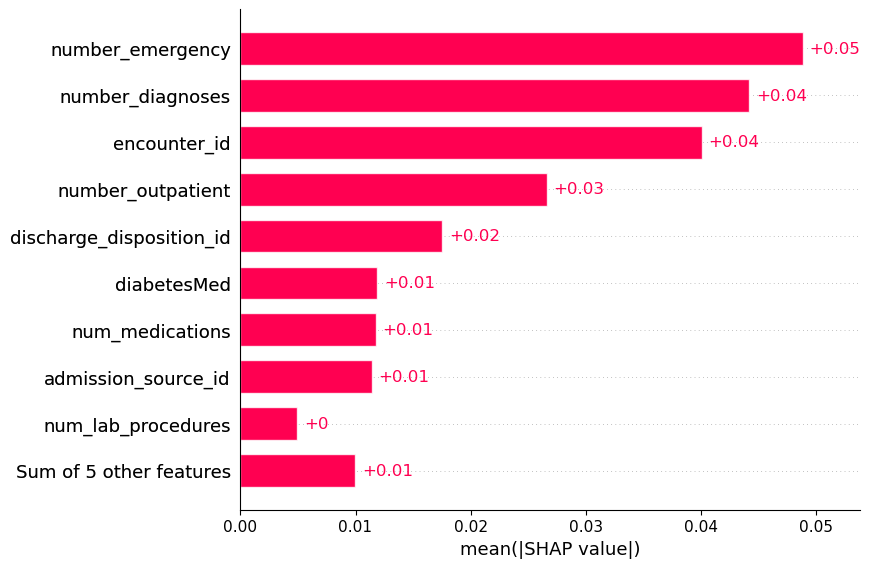

In [18]:
import shap
feature_names = list(X_test.columns)

# Calculate SHAP values for your test set

explainer = shap.TreeExplainer(randomforest_model)
shap_values = explainer.shap_values(X_test)
# Create an Explanation object from the SHAP values with feature names
explanation = shap.Explanation(shap_values, X_test, feature_names=feature_names)

# Plot the SHAP values graph with feature names
shap.plots.bar(explanation)